In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Carregamento do dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalização para Regressão Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Modelos
# Regressão Logística
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 4. Avaliação
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Construir tabela comparativa
results = {
    "Regressão Logística": [
        report_lr["accuracy"],
        report_lr["macro avg"]["precision"],
        report_lr["macro avg"]["recall"],
        report_lr["macro avg"]["f1-score"]
    ],
    "Random Forest": [
        report_rf["accuracy"],
        report_rf["macro avg"]["precision"],
        report_rf["macro avg"]["recall"],
        report_rf["macro avg"]["f1-score"]
    ],
}

results_df = pd.DataFrame(
    results,
    index=["Acurácia", "Precisão (macro)", "Revocação (macro)", "F1-score (macro)"]
)

# Exibir resultados
print(results_df)


                   Regressão Logística  Random Forest
Acurácia                      0.981481            1.0
Precisão (macro)              0.982456            1.0
Revocação (macro)             0.984127            1.0
F1-score (macro)              0.982861            1.0


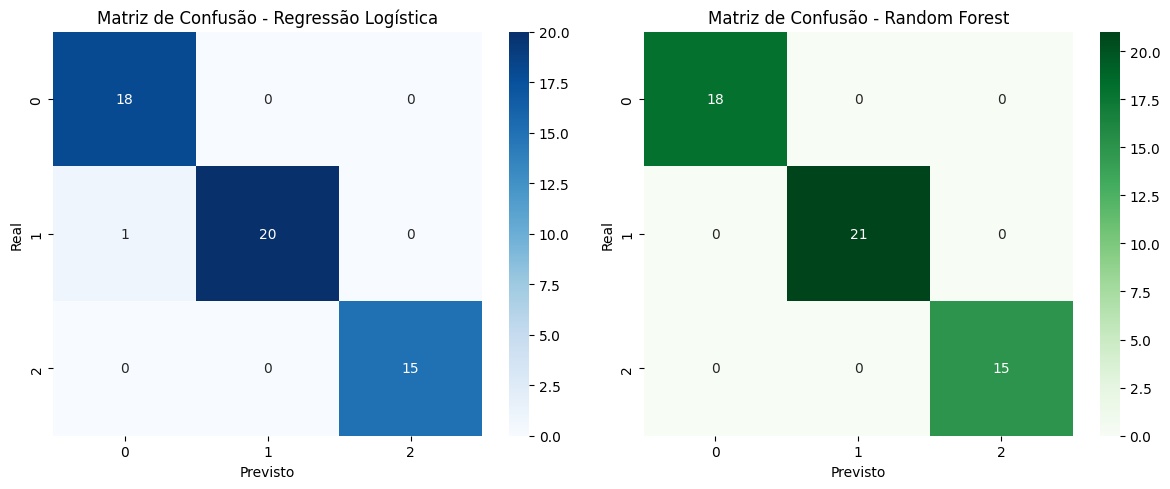

/tmp/ipython-input-1818993210.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(wine.feature_names)[indices], palette="viridis")


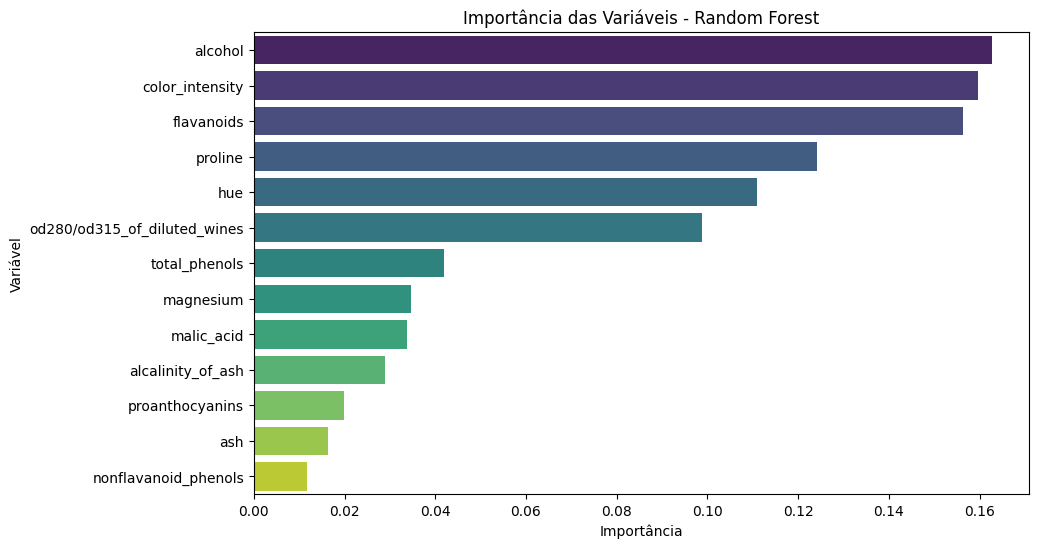

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Matriz de confusão
# =========================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz - Regressão Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusão - Regressão Logística")
axes[0].set_xlabel("Previsto")
axes[0].set_ylabel("Real")

# Matriz - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusão - Random Forest")
axes[1].set_xlabel("Previsto")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

# =========================
# Importância das variáveis (Random Forest)
# =========================
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(wine.feature_names)[indices], palette="viridis")
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()